# Chemical Space Exploration, Dimensionality Reduction and Clustering - Seminar Notebook

In [ ]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### 0. CHEMICAL SPACE EXPLORATION

#### 0.0. Introduction to Chemical Space Exploration

**What Is Chemical Space?** 

Chemical space refers to the multidimensional space encompassing all possible chemical compounds, defined by their molecular descriptors. Each molecule can be represented as a point within this space, characterized by properties such as molecular weight, logP, hydrogen bond donors/acceptors, and more.

Understanding chemical space is crucial in cheminformatics, as it allows researchers to:
- Visualize the diversity and distribution of chemical compounds.
- Identify regions with high or low compound density.
- Select representative subsets of compounds for screening or modeling.
- Explore relationships between chemical structure and some target value, like biological activity, yield...

**How Is Chemical Space Constructed?**

Chemical space is typically defined using **molecular descriptors**, quantitative representations of chemical structures. These can include:

- Physicochemical descriptors (e.g., MW, logP)
- Structural descriptors (e.g., number of rings, rotatable bonds)
- Quantum mechanical properties (e.g., HOMO/LUMO, dipole moment)

Descriptors are often computed using cheminformatics tools like **RDKit**, **PaDEL**, or **AQME**.

The resulting data forms a high-dimensional matrix where rows are molecules and columns are descriptors, this is the foundation of the chemical space.

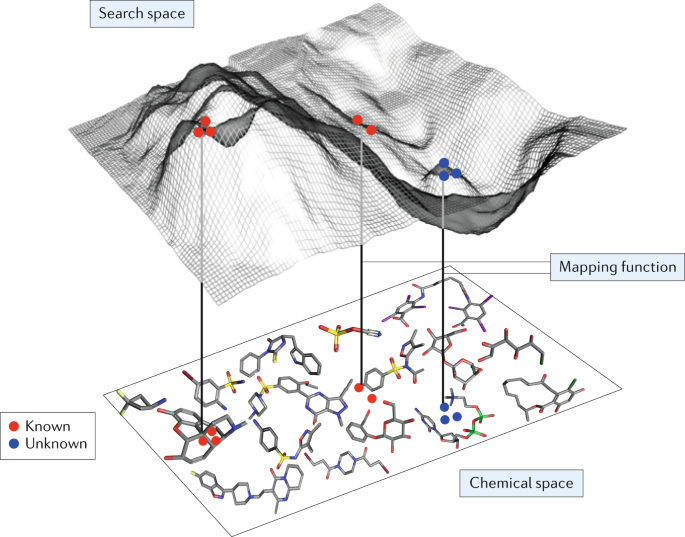

**Importance in Machine Learning**

In the context of machine learning (ML) applied to chemistry, exploring chemical space enables:

- **Efficient Model Training**: By selecting diverse and representative compounds, models can be trained more effectively.
- **Improved Generalization**: Ensuring that training data covers a broad chemical space helps models generalize to unseen compounds.
- **Identification of Novel Compounds**: Exploring underrepresented regions can lead to the discovery of novel compounds with desired properties.

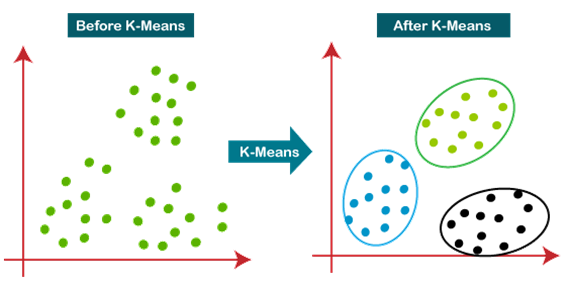

### 1. DIMENSIONALITY REDUCTION

#### 1.0. Introduction to Dimensionality Reduction

**Why Reduce Dimensionality?** 

Chemical descriptors can result in high-dimensional datasets, which pose challenges such as:

- **Computational Complexity**: High-dimensional data requires more computational resources.
- **Overfitting**: Models may capture noise instead of underlying pattern.
- **Visualization Difficulties**: It's challenging to visualize data beyond three dimensions.

Dimensionality reduction addresses these issues by transforming high-dimensional data into a lower-dimensional space while preserving essential information.

**Techniques for Dimensionality Reduction**

Several techniques are employed to reduce dimensionality:
- **Principal Component Analysis (PCA)**: A linear method that transforms data into a new coordinate system, maximizing variance along principal components.
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A nonlinear technique that emphasizes local structure, useful for visualizing clusters.
- **Uniform Manifold Approximation and Projection (UMAP)**: Preserves both local and global structure, suitable for large datasets.
- **Autoencoders**: Neural network-based models that learn efficient codings of input data.

#### 1.1. Principal Component Analysis (PCA)

One of the applications of PCA is the reduction of dimensionality (variables), losing as little information (variance) as possible: when we have a large number of possibly correlated quantitative variables (indicative of redundant information), PCA allows us to reduce them to a smaller number of transformed variables (principal components) that explain a large part of the variability in the data. 

Each dimension or principal component generated by PCA will be a **linear combination of the original variables**, and they will also be **independent or uncorrelated with each other**.
PCA **identifies the directions** (principal components) **along which the variance in the data is maximized**. The first principal component captures the most variance, the second captures the next most, and so on.

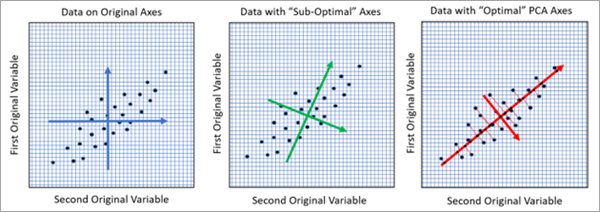

Example of a two-dimensional PCA:
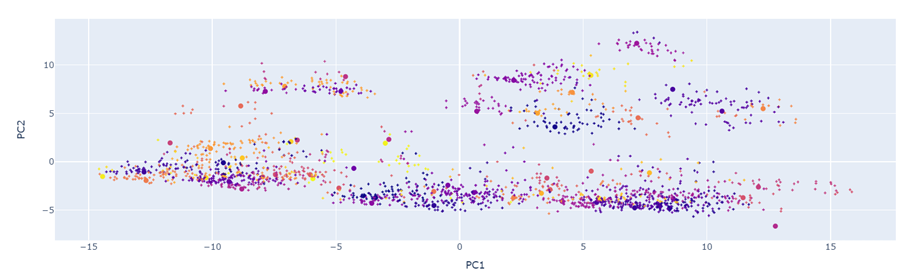

**Key Concepts**:

- **Variance Explained**: The proportion of the dataset's variance captured by each principal component.

- **Scree Plot**: A plot showing the variance explained by each principal component, helping determine the number of components to retain.


**How Does PCA Work?**

Principal Component Analysis (PCA) is a linear technique that:
1. Computes the **covariance matrix** of your descriptors.
2. Calculates its **eigenvectors and eigenvalues**.
3. Selects the top components (eigenvectors) that explain the highest **variance**.
4. Projects your data into a new space with fewer dimensions (e.g., 2D or 3D).

Each **Principal Component (PC)** is a linear combination of original features, and their order reflects how much **variance** they explain.


**Why Standardize Data Before PCA?**

Standardization (scaling the data to have zero mean and unit variance) is crucial before applying PCA or clustering algorithms like K-Means because:

- **PCA** is sensitive to the variance of each feature. Descriptors with larger scales will dominate the principal components unless scaled.

Standardizing ensures that all descriptors contribute equally to the analysis.


**How Do You Check If the Reduction Is Good?**

To determine if the PCA result is meaningful:
- Use `pca.explained_variance_ratio_` to see how much variance is captured by each PC.
- Typically, retaining **≥70%** of the variance is considered acceptable.

Example of a three-dimensional PCA
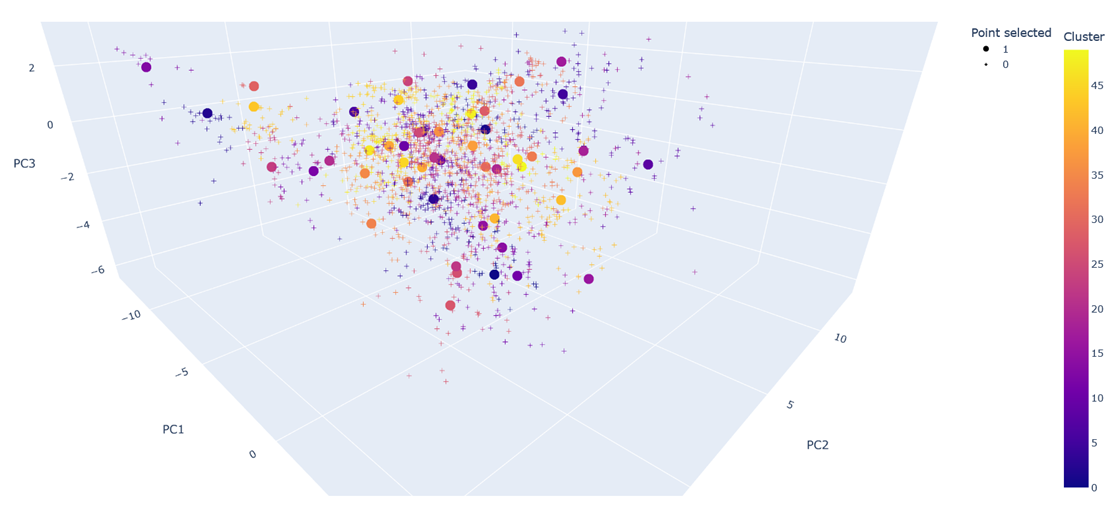

#### 1.2. Practical Example: PCA on Chemical Descriptors

In [ ]:
import pandas as pd                       # for handling tabular data
from sklearn.decomposition import PCA     # for dimensionality reduction
import matplotlib.pyplot as plt           # for data visualization
import seaborn as sns                     # for data visualization
from sklearn.preprocessing import StandardScaler  # standardized data

# Load the dataset
df = pd.read_csv('AQME-ROBERT_interpret_oxygenated_compounds.csv')

# The first column is molecule names, the second one is the SMILES and the rest are descriptors
molecule_names = df.iloc[:, 0]
smiles = df.iloc[:, 1]
descriptors = df.iloc[:, 2:] # Split the DataFrame into numerical descriptors for PCA
'''
.iloc is a Pandas method used to select data from a df using the position of the ndexes (integer-based)
[:, 2:] This part specifies which rows and columns to select
: (before the comma): Means we want to select all rows in the DataFrame.
2: (after the comma): Means we want to select all columns starting at index position 2 
(which would be the third column, since indexing in Python starts at 0). 
Position 2 includes that column and all those to its right.
'''
# prepare array for PCA
# standardize the data
scaler = StandardScaler()
X_scaled= scaler.fit_transform(descriptors)

# # Perform PCA
pca = PCA(n_components=2)                              # Create a PCA object that keeps only the first 2 components
principal_components = pca.fit_transform(X_scaled)     # Fit the PCA model and apply the dimensionality reduction

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Molecule'] = molecule_names

# Plot the PCA results, visualizes your chemical space using the top two principal components
plt.figure(figsize=(10, 7))                            # Set figure size
sns.scatterplot(data=pca_df, x='PC1', y='PC2')         # Create scatterplot
plt.title('PCA of Chemical Descriptors')               # Plot title
plt.xlabel('Principal Component 1')                    # X-axis label
plt.ylabel('Principal Component 2')                    # Y-axis label
plt.show()                                             # Display the plot

#### 1.3. Practical Example: Evaluating the Quality of Reduction

To assess how well the PCA captures the variance in the data:

In [ ]:
# prepare array for PCA
# standardize the data
scaler = StandardScaler()
X_scaled= scaler.fit_transform(descriptors)

# # Perform PCA
pca = PCA(n_components = 2)                              
principal_components = pca.fit_transform(X_scaled)


explained_var = pca.explained_variance_ratio_
total_explained = explained_var.sum()
print(f"Total variance explained by 2 components: {total_explained:.2%}")

# Calculate the cumulative variance explained
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)

# Plot the cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

A common criterion is to retain enough principal components to explain at least 70% of the variance.

### 2. CLUSTERING

#### 2.0. Introduction to Clustering

**What Is Clustering?**

Clustering involves grouping molecules based on similarity in their descriptors, facilitating:

- **Library Design**: Selecting diverse representatives for screening.
- **Data Reduction**: Simplifying datasets by focusing on representative clusters.
- **Pattern Recognition**: Identifying natural groupings in data.

**Common Clustering Algorithms**:
- **K-Means Clustering**: Partitions data into K clusters by minimizing within-cluster variance.
- **Hierarchical Clustering**: Builds a tree of clusters based on distance metrics.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups together points that are closely packed, marking as outliers points that lie alone in low-density regions.

#### 2.1. Focus on K-Means Clustering

**Algorithm Overview**:

1. **Choose the number of clusters (K)**: This is the number of groups you expect your data to form.

3. **Initialize K centroids**: These are randomly selected points that act as the "center" of each cluster.


4. **Assign points to clusters**: Each molecule is assigned to the nearest centroid based on Euclidean distance.


5. **Update centroids**: Recalculate the centroid of each cluster as the **mean** of all points assigned to it.


6. **Repeat**: The algorithm repeats the assignment and update steps until centroids no longer change significantly (i.e., convergence).

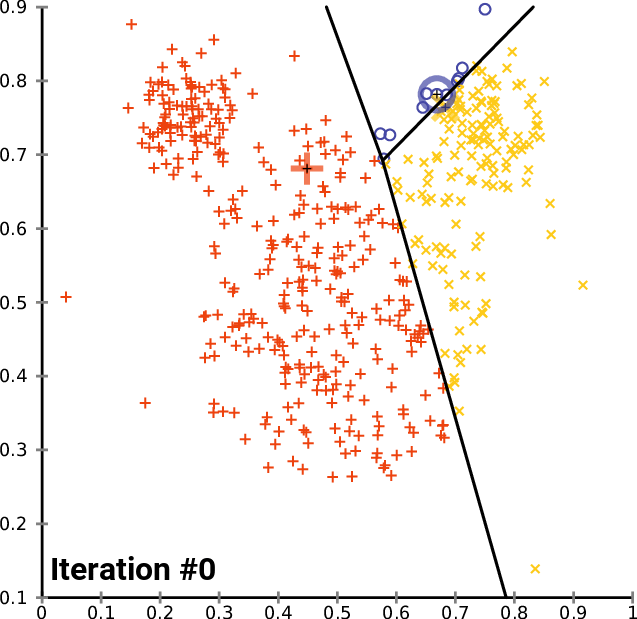
  
**Pros**:
- Simple and fast.
- Works well with spherical and equally sized clusters.

**Limitations**:
- Sensitive to outliers.
- K must be chosen manually.


**Standardize Data Before Clustering**

Standardization (scaling the data to have zero mean and unit variance) is crucial before applying clustering algorithms like K-Means because:

- **K-Means** relies on distance calculations (typically Euclidean). If features are on different scales, those with larger ranges will disproportionately influence the cluster formation.

Standardizing ensures that all descriptors contribute equally to the analysis.

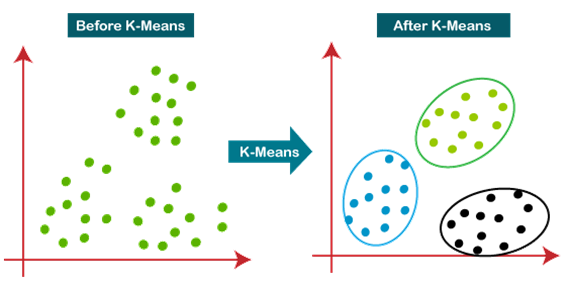

Example of K-Means clustering
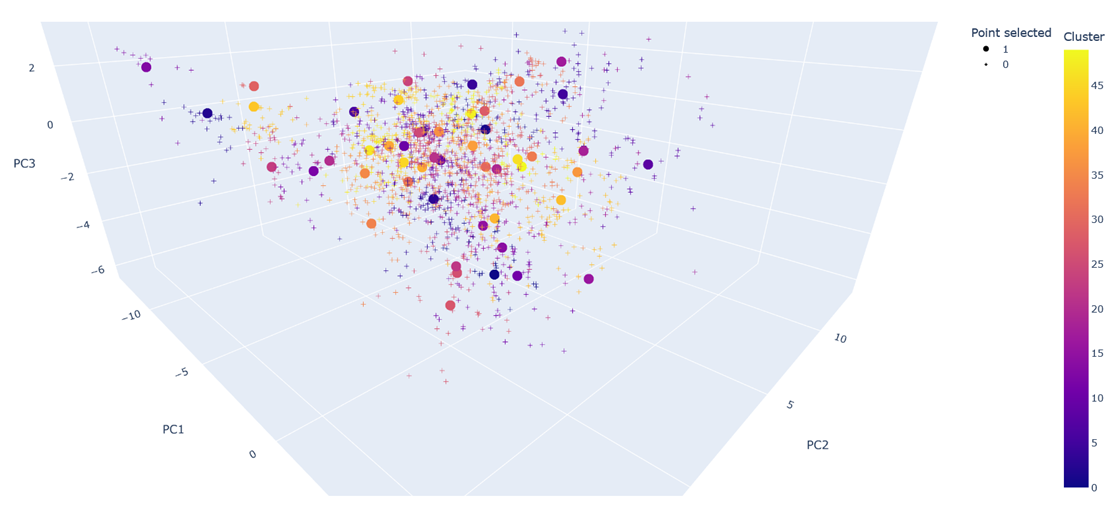

#### 2.2. Implementing K-Means Clustering

In [ ]:
# prepare array for K-Means
# standardize the data: rescales the data so each feature has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled= scaler.fit_transform(descriptors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state = 0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plot the clustered PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

# Find closest point in each cluster to its centroid
closest_indices, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_scaled)

# Get the corresponding molecule names or rows from original DataFrame
representative_molecules = df.iloc[closest_indices]
print(representative_molecules)

# Extract the PCA coordinates for those molecules
representatives = pca_df.iloc[closest_indices]

# Plot the PCA scatter plot with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=50, alpha=0.8)

# Overlay representative molecules as x
plt.scatter(
    representatives['PC1'],
    representatives['PC2'],
    color='black',
    marker='x',
    s=20,
    label='Cluster centroid representative'
)

# Final plot formatting
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### 2.2. Exploring ALMOS for Clustering

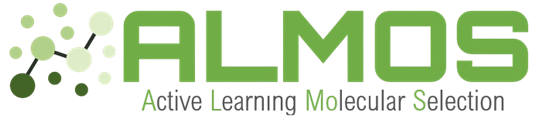

 **ALMOS (Automated Library MOlecular Selection)** 

- It is an intuitive and accessible tool designed to support the use of machine learning in chemistry, especially by experimental chemists.

- The tool provides two main modules, which can be used independently: **clustering** and **active learning**.
 
- It can be installed in just a few minutes and is openly available on GitHub.  **ALMOS on GitHub**:
[ALMOS GitHub Repository](https://github.com/MiguelMartzFdez/almos)

**Installation in Anaconda_Prompt**

> conda activate cheminf

> pip install almos-kit

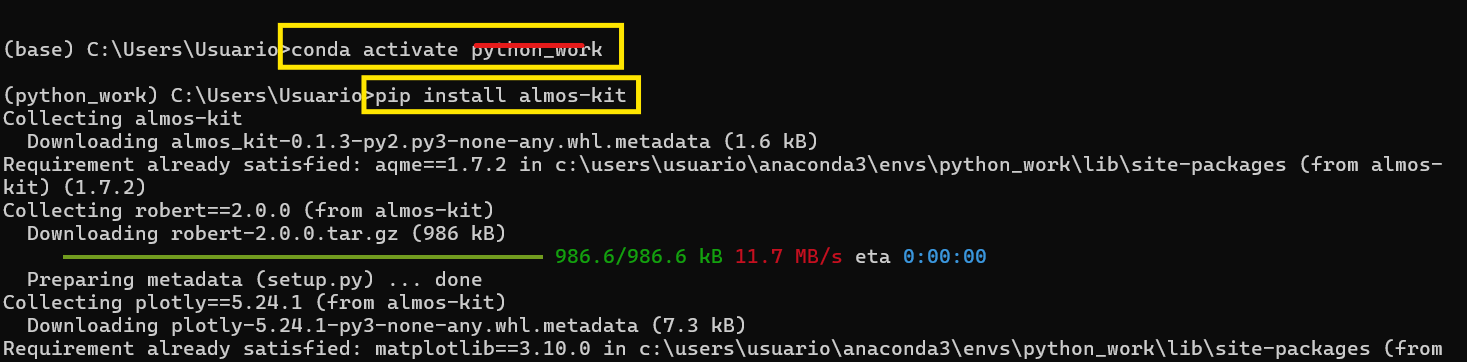

Restart the kernel:

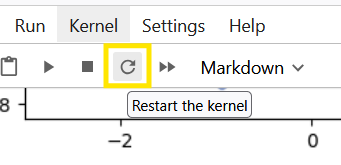

Run the imports again

In [ ]:
'''
Running ALMOS cluster from a CSV with descriptors

Things that you have to define in this case:
--input       AQME-ROBERT_interpret_oxygenated_compounds.csv
--n_clusters  3
--name        code_name
--ignore      ['SMILES']
'''
import subprocess

cmd_qdescp = "python -m almos --cluster --input AQME-ROBERT_interpret_oxygenated_compounds.csv --n_clusters 3 --ignore ['SMILES'] --name code_name"
subprocess.run(cmd_qdescp)

> python -m almos --cluster --input AQME-ROBERT_interpret_oxygenated_compounds.csv --n_clusters 3 --ignore ['SMILES'] --name code_name

In [ ]:
'''
Running ALMOS cluster from a CSV withOUT descriptors:

Things that you have to define in this case:
--input       oxygenated_compounds.csv
              nitriles.sdf
--n_clusters  3
--aqme

Notice: if you want to generate descriptors to clustering in ALMOS, you can introduce a CSV or SDF file
'''

import subprocess

descp_file = 'nitriles_reducido.sdf'
n_clusters = '3'

cmd_qdescp = "python -m almos --cluster --input oxygenated_compounds.csv --n_clusters 3 --aqme"
subprocess.run(cmd_qdescp)

> python -m almos --cluster --input oxygenated_compounds.csv --n_clusters 3 --aqme